In [17]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement

States = np.array([0,1]) 
Prior =  np.array([0.2,0.8])

T = np.array([[0.8,0.2],[0.2,0.8]])

E = np.array([[0.5,0.9],[0.5,0.1]])

DictH = {0:'Justa',1:'Truncada'}
DictO = {0:'Cara',1:'Sello'}

Obs = np.array([1,0,0,0,1,0,1,0])




In [18]:
#a
def GetHiddenStates(States, N):
    CStates = list( combinations_with_replacement(States,N) )
    Permu = []
    for it in CStates:
        p = list(permutations(it,N))
        for i in p:
            if i not in Permu:
                Permu.append(i)
    print(CStates)
    return np.array(Permu)

In [19]:
#b
def GetProb(T,E,Obs,State,Prior):
    n = len(Obs)
    p = 1.
    p *= Prior[State[0] ]
    for i in range(n-1):
        p *= T[ State[i+1], State[i] ]
    for i in range(n):
        p *= E[ Obs[i], State[i] ]
    return p

In [20]:
#c
HiddenStates = GetHiddenStates(States,8)
dim = HiddenStates.shape[0]
P = np.zeros(dim)

for i in range(dim):
    P[i] = GetProb(T,E,Obs,HiddenStates[i],Prior)

[(0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 0, 1, 1, 1), (0, 0, 0, 0, 1, 1, 1, 1), (0, 0, 0, 1, 1, 1, 1, 1), (0, 0, 1, 1, 1, 1, 1, 1), (0, 1, 1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1, 1, 1)]


In [21]:
maxP = np.max(P)
ii = np.where( P == np.amax(P))
print(HiddenStates[ii],maxP)



[[1 1 1 1 0 0 0 0]] 0.0001911029760000001


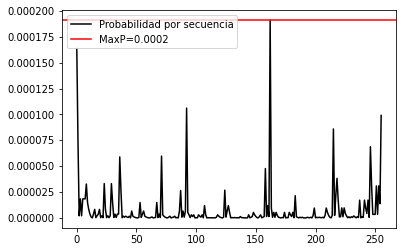

In [23]:
plt.plot(P,color='black',label='Probabilidad por secuencia')
plt.axhline(y=maxP,color='red',label='MaxP=0.0002')
plt.legend()

In [24]:
#d
HiddenStates = GetHiddenStates(States,8)
ObservedStates = HiddenStates
dim = HiddenStates.shape[0]
P = np.zeros(dim) 
for i in range(dim):
    P[i] = GetProb(T,E,Obs,HiddenStates[i],Prior)
P_i = np.zeros((dim, dim))
for j in range(dim):
  Obs = ObservedStates[j]
  for i in range(dim):
      P_i[i][j] = GetProb(T,E,Obs,HiddenStates[i],Prior)
total_p = np.sum(P_i)
total_p
print(total_p)

[(0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 0, 1, 1, 1), (0, 0, 0, 0, 1, 1, 1, 1), (0, 0, 0, 1, 1, 1, 1, 1), (0, 0, 1, 1, 1, 1, 1, 1), (0, 1, 1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1, 1, 1)]
1.0000000000000004
